In [4]:
# Import libraries and dependencies
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

In [36]:
# Reading Whale Returns
whale_returns_csv = Path("../Resources/whale_returns.csv")
# Read CSV into DataFrame
whale_returns_df = pd.read_csv(whale_returns_csv, index_col="Date",  infer_datetime_format=True, parse_dates=True)
whale_returns_df.sort_index()
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [37]:
# Check for null
whale_returns_df.isnull()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,True,True,True,True
2015-03-03,False,False,False,False
2015-03-04,False,False,False,False
2015-03-05,False,False,False,False
2015-03-06,False,False,False,False
...,...,...,...,...
2019-04-25,False,False,False,False
2019-04-26,False,False,False,False
2019-04-29,False,False,False,False


In [38]:
# Determining number of null values
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON &amp; CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [39]:
# Drop null values
whale_returns_df.dropna(inplace=True)
whale_returns_df
# Check for null values again
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON &amp; CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [26]:
### Reading and cleaning Algorithmic Daily Returns

In [56]:
algo_returns_csv = Path("../Resources/algo_returns.csv")
algo_returns_df = pd.read_csv(algo_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_returns_df.sort_index()
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [10]:
algo_returns_df.isnull().sum()

Date      0
Algo 1    0
Algo 2    6
dtype: int64

In [11]:
algo_returns_df.dropna(inplace=True)
algo_returns_df
algo_returns_df.isnull().sum()

Date      0
Algo 1    0
Algo 2    0
dtype: int64

In [1]:
### S&P 500 Returns

In [41]:
sp500_history_csv = Path("../Resources/sp500_history.csv")
sp500_history_df = pd.read_csv(sp500_history_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_history_df.sort_index()
sp500_history_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [42]:
# Check Data Types
sp500_history_df.dtypes

Close    object
dtype: object

In [46]:
# Fix Data Types - Not sure what is meant to be done here??
sp500_history_df["Close"] = sp500_history_df["Close"].str.replace('$', '')
sp500_history_df["Close"] = sp500_history_df["Close"].astype(float)

AttributeError: Can only use .str accessor with string values!

In [47]:
sp500_history_df.dtypes

Close    float64
dtype: object

In [48]:
# Calculate Daily Returns - Need help!
daily_returns = sp500_history_df.pct_change()
daily_returns.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [51]:
# Drop nulls - Need Help!
daily_returns.dropna(inplace=True)
daily_returns
daily_returns.head()

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [53]:
# Rename Column to "S&P 500"
daily_returns.rename(columns = {'Close':'S&P 500'}, inplace=True)
daily_returns.head()

,S&P 500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [57]:
### Combine Whale, Algorithmic, and S&P 500 Returns
column_appended_data = pd.concat([whale_returns_df, algo_returns_df, daily_returns], axis="columns", join="inner")
column_appended_data

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577


In [33]:
### Portfolio Analysis

In [69]:
## Performance
# Calculate and plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500?


&lt;matplotlib.axes._subplots.AxesSubplot at 0x7f9626c28370&gt;

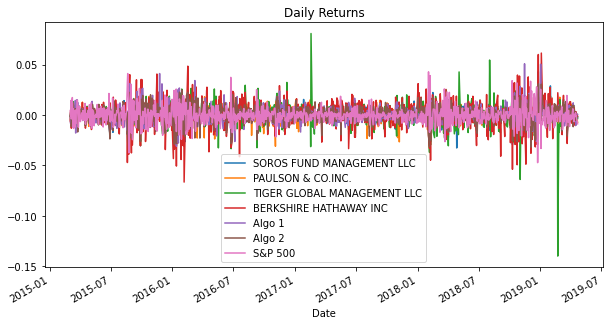

In [71]:
# Plot Daily Returns
column_appended_data.plot(figsize=(10,5), title="Daily Returns")

&lt;matplotlib.axes._subplots.AxesSubplot at 0x7f9626e2a550&gt;

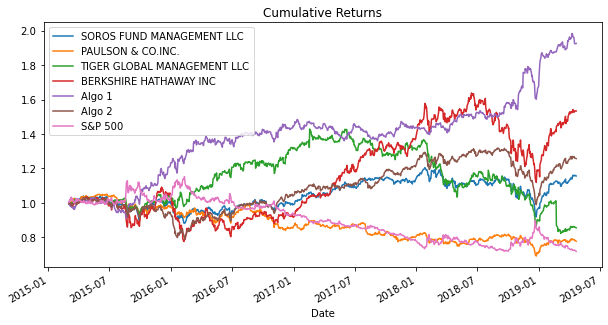

In [74]:
# Plot cumulative returns
cumulative_returns = (1 + column_appended_data).cumprod() 
cumulative_returns.plot(figsize=(10,5), title="Cumulative Returns")

In [64]:
## Risk

&lt;matplotlib.axes._subplots.AxesSubplot at 0x7f9627c735b0&gt;

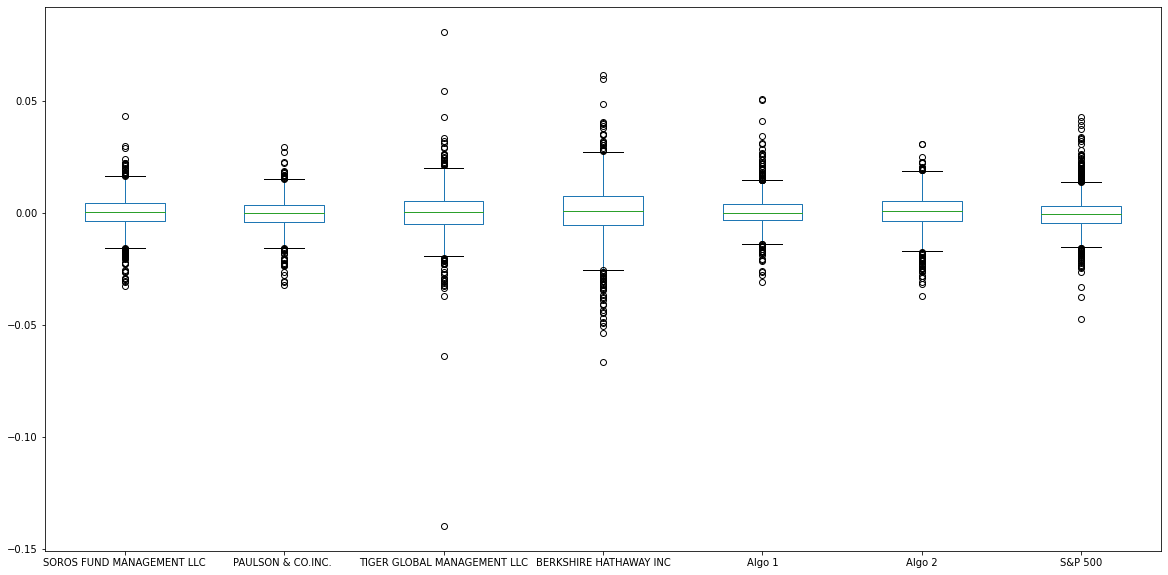

In [78]:
# Box plot to visually show risk
column_appended_data.boxplot(figsize=(20,10), grid=False)

In [80]:
# Daily standard deviations
column_appended_data.std()

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON &amp; CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
S&amp;P 500                        0.008587
dtype: float64

In [84]:
# calculate the standard deviation for each portfolio
sp500_dev = column_appended_data["S&P 500"].std()
column_appended_data.std()>=sp500_dev
# which portfolios are riskier than the S&P 500?


SOROS FUND MANAGEMENT LLC      False
PAULSON &amp; CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&amp;P 500                         True
dtype: bool